In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2


## Load the data


In [2]:
import pandas as pd

pd.set_option('display.max_columns', None)
df = pd.read_csv('train.csv')

df.head(30)

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.200,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.000,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.000,-999.000,46.226
2,100002,b,-999.000,162.172,125.953,35.635,-999.000,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.000,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.000,-999.000,44.251
3,100003,b,143.905,81.417,80.943,0.414,-999.000,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.000,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,100004,b,175.864,16.915,134.805,16.405,-999.000,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.000,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
5,100005,b,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,278.876,0.588,0.479,0.975,53.651,0.371,1.329,31.565,-0.884,1.857,40.735,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660
6,100006,s,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,305.967,3.371,1.393,0.791,28.850,1.113,2.409,97.240,0.675,-0.966,38.421,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877
7,100007,s,154.916,10.418,94.714,29.169,-999.000,-999.000,-999.000,2.897,1.526,138.178,0.365,-1.305,-999.000,78.800,0.654,1.547,28.740,0.506,-1.347,22.275,-1.761,187.299,1,30.638,-0.715,-1.724,-999.000,-999.000,-999.000,30.638
8,100008,b,105.594,50.559,100.989,4.288,-999.000,-999.000,-999.000,2.904,4.288,65.333,0.675,-1.366,-999.000,39.008,2.433,-2.532,26.325,0.210,1.884,37.791,0.024,129.804,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
9,100009,s,128.053,88.941,69.272,193.392,-999.000,-999.000,-999.000,1.609,28.859,255.123,0.599,0.538,-999.000,54.646,-1.533,0.416,32.742,-0.317,-0.636,132.678,0.845,294.741,1,167.735,-2.767,-2.514,-999.000,-999.000,-999.000,167.735


-999.000 means missing value.

Prediction and PRI_jet_num are categorical values (22th column).

Others are continuous.

In [549]:
from load import *
from helpers import load_csv_data

data_path_tr = "train.csv"
data_path_te = "test.csv"
data_path_sub = "sample-submission.csv"

# load data.
y_tr, x_tr, ids_tr = load_csv_data(data_path_tr, sub_sample=False)
y_te, x_te, ids_te = load_csv_data(data_path_te, sub_sample=False)
y_su, x_su, ids_su = load_csv_data(data_path_sub, sub_sample=False)

#split the data into training testing


In [40]:
print(y_tr)
#print(np.where(y_te==-1))

[1. 0. 0. ... 1. 0. 0.]


## Plot data

C:\Users\maxim\AppData\Local\Temp\ipykernel_3572\1991182130.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,5))


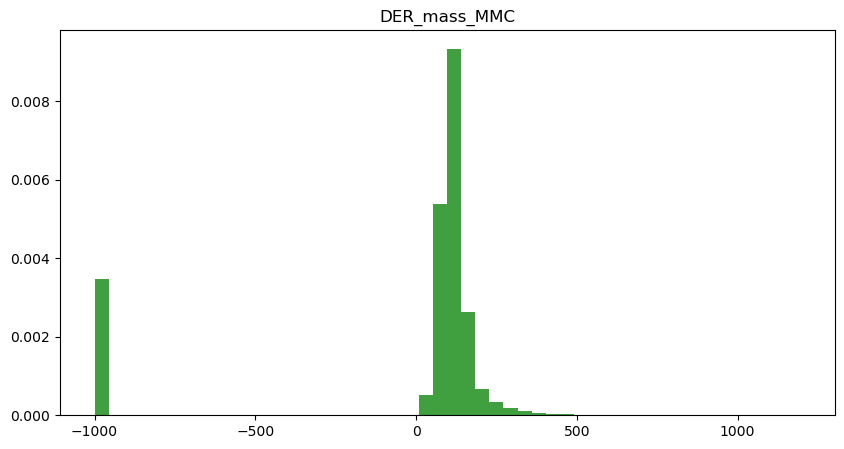

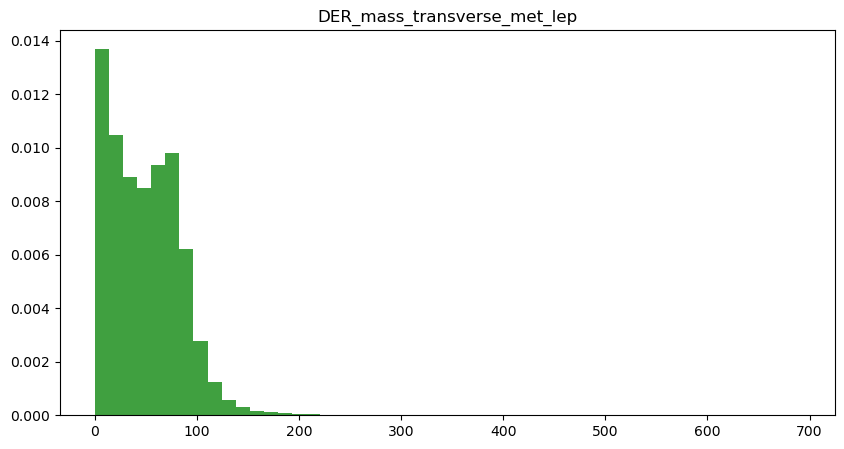

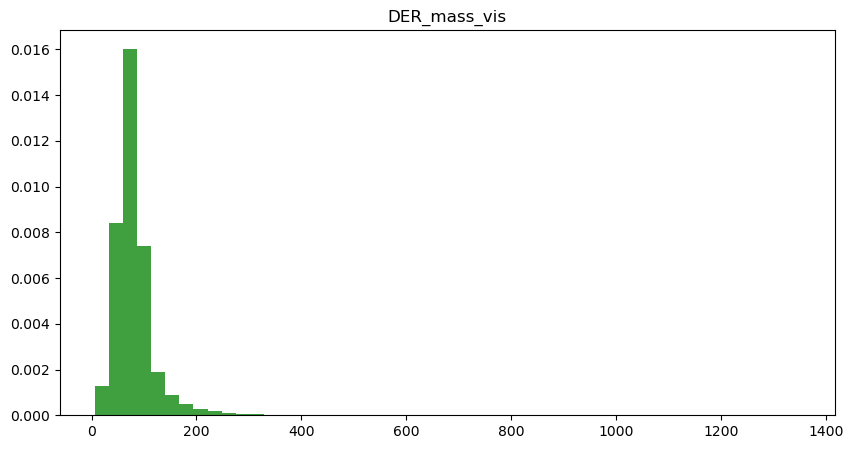

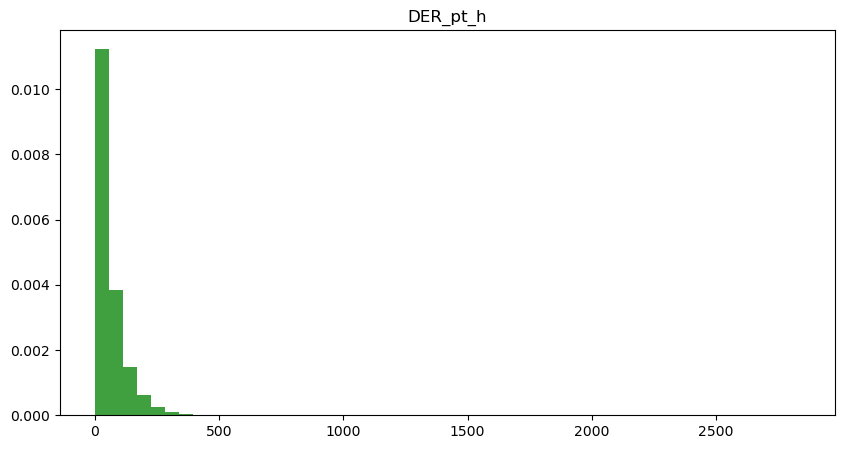

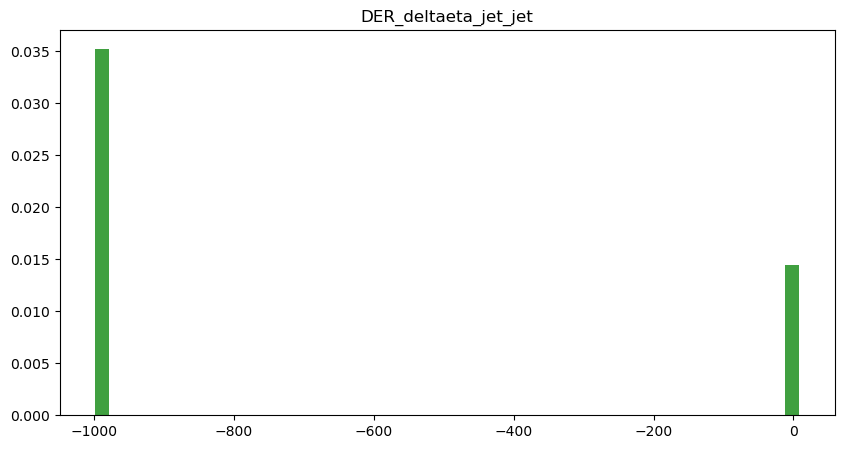

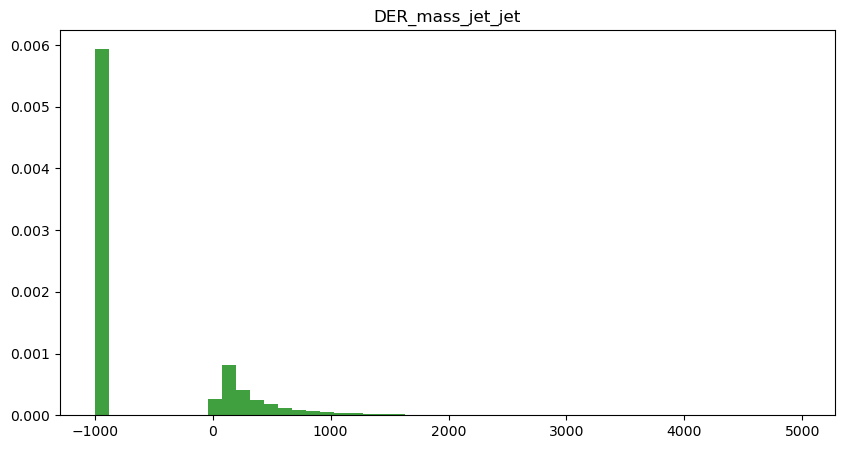

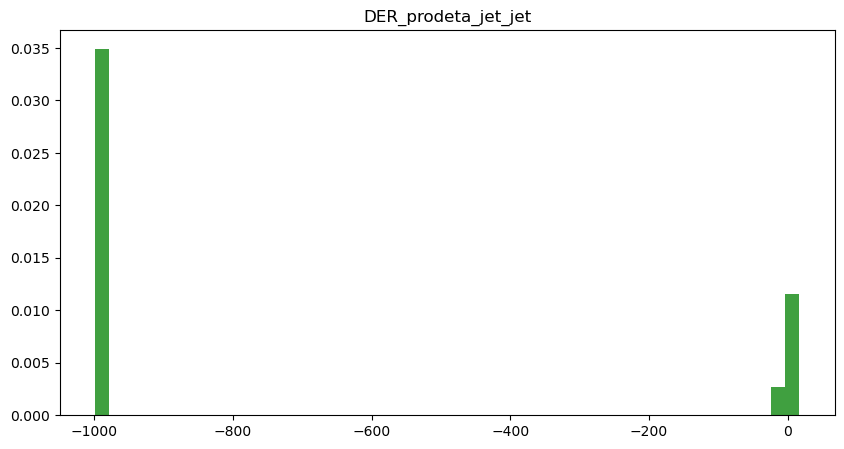

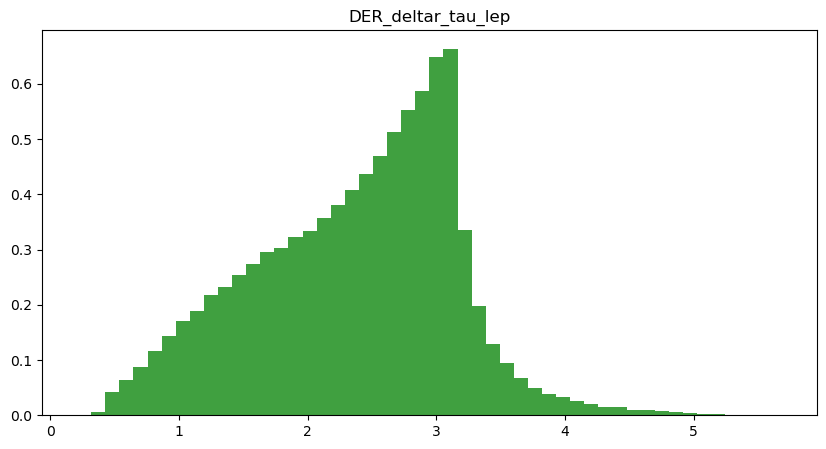

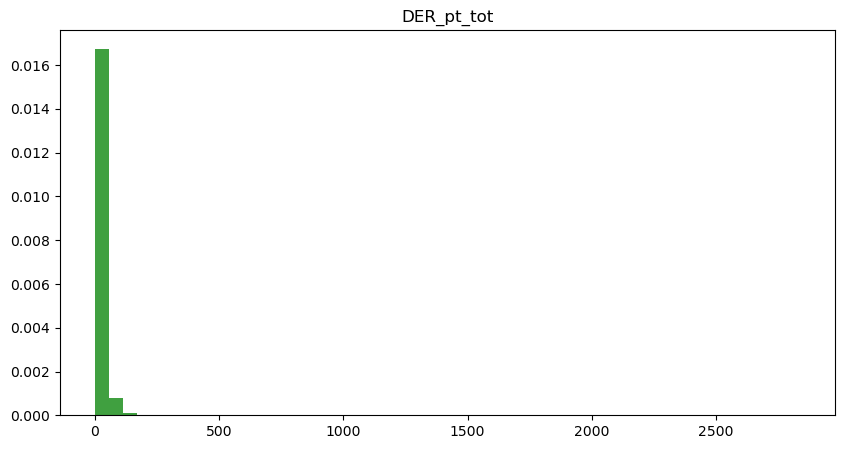

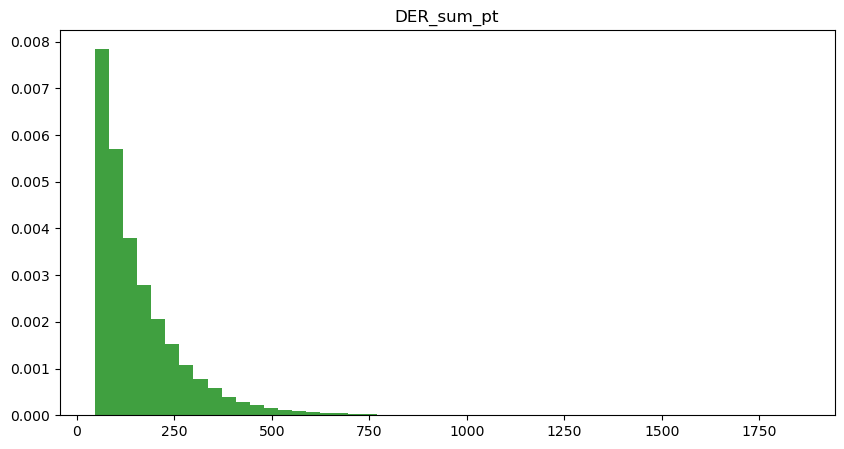

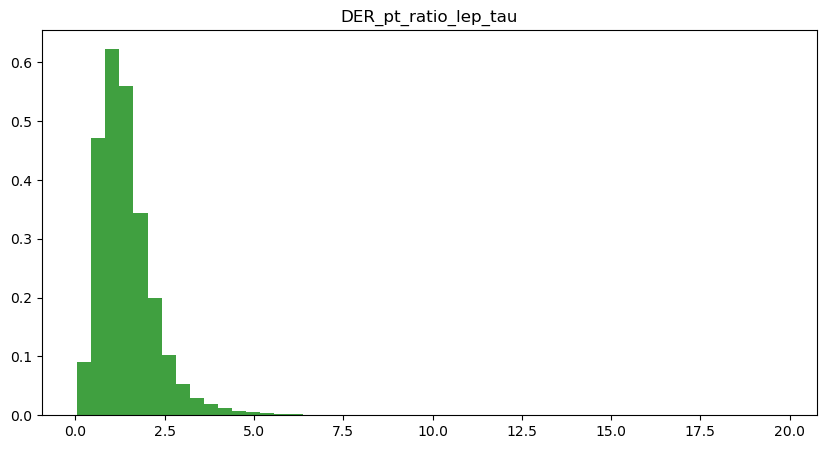

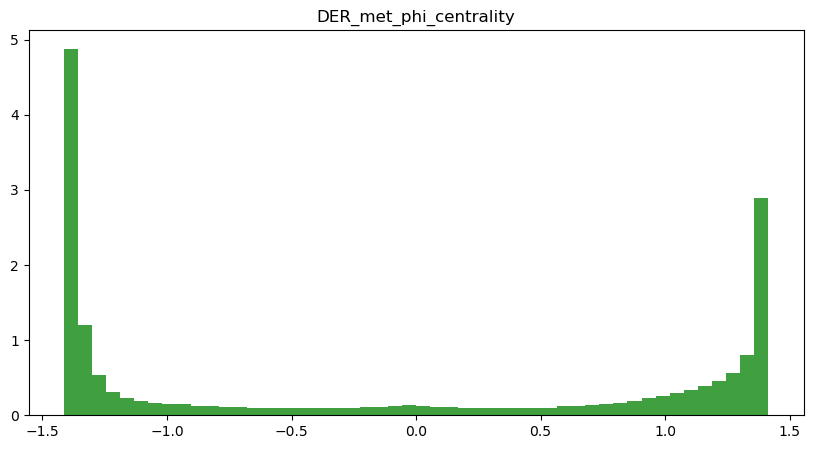

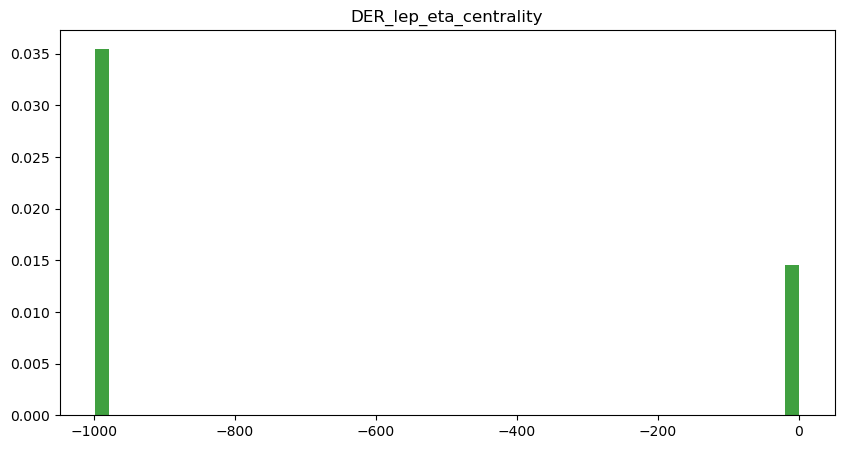

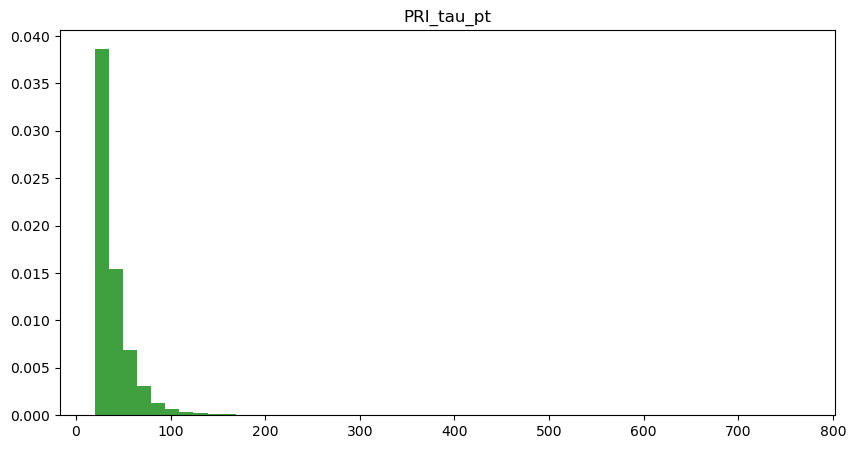

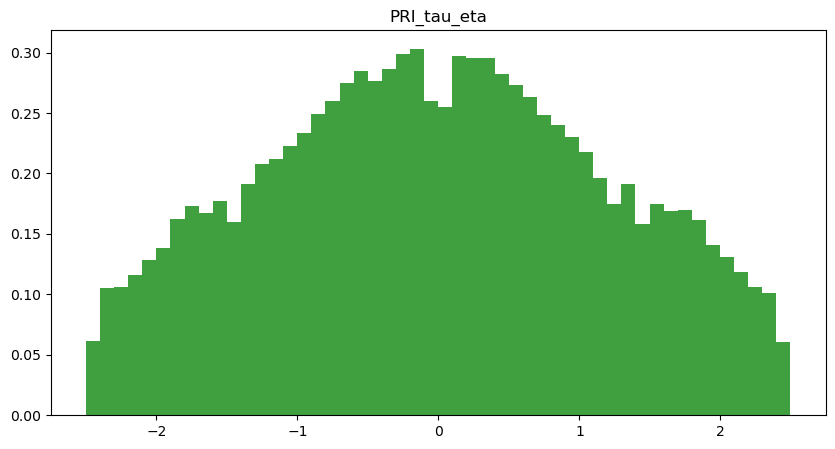

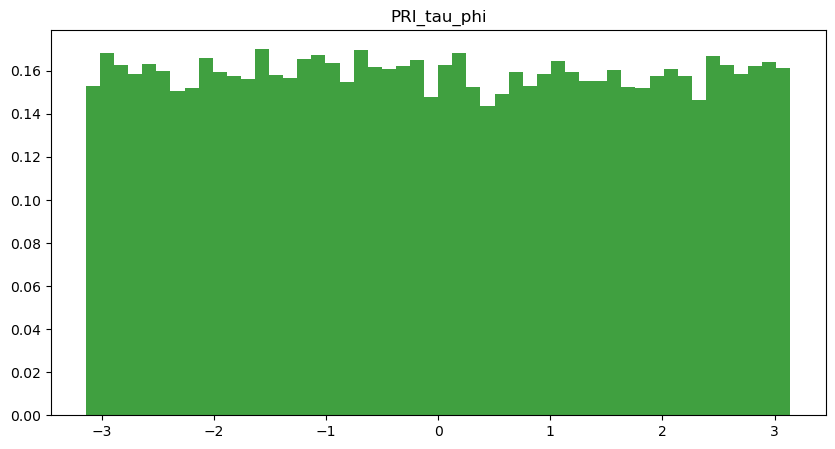

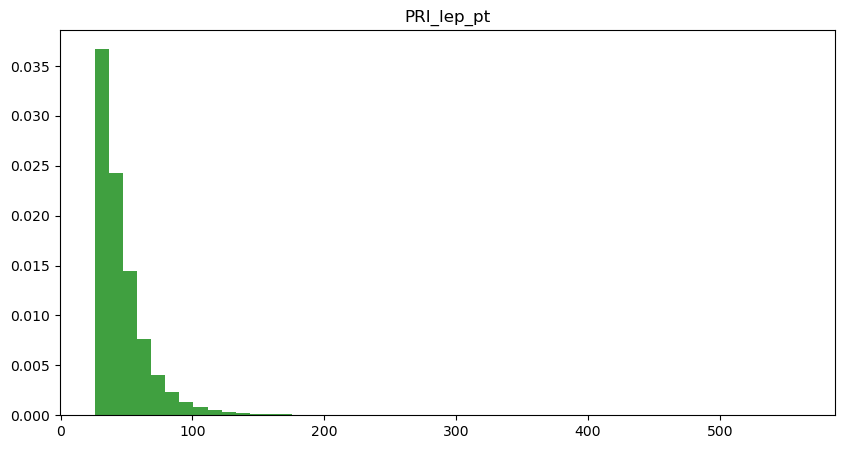

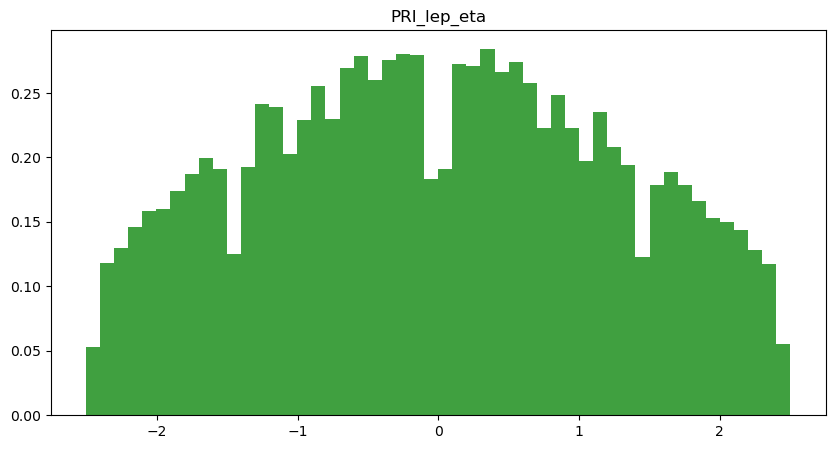

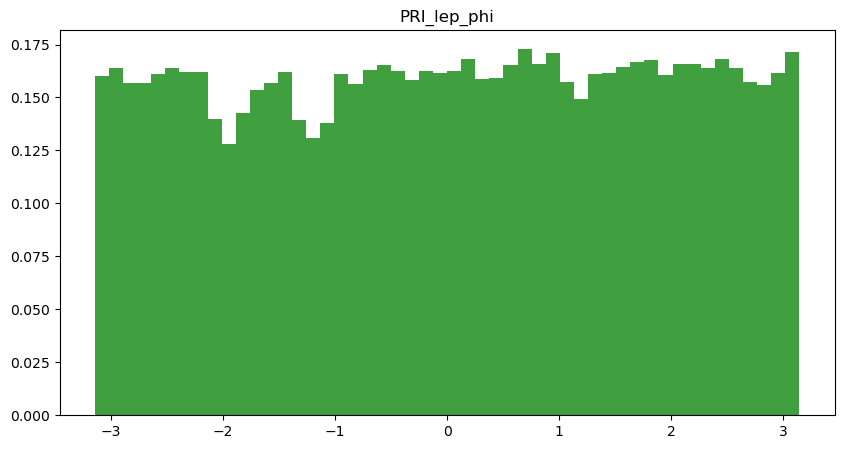

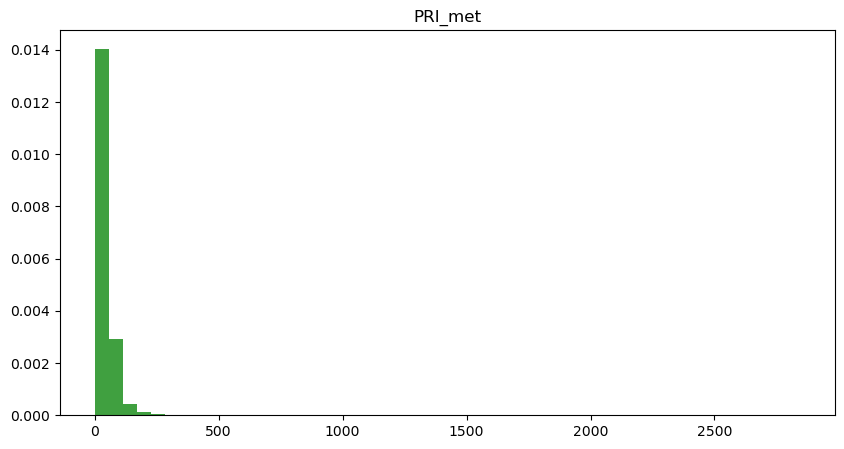

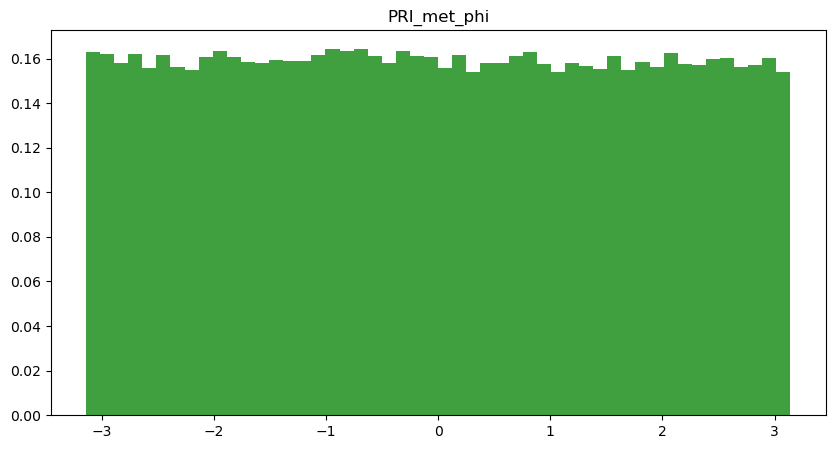

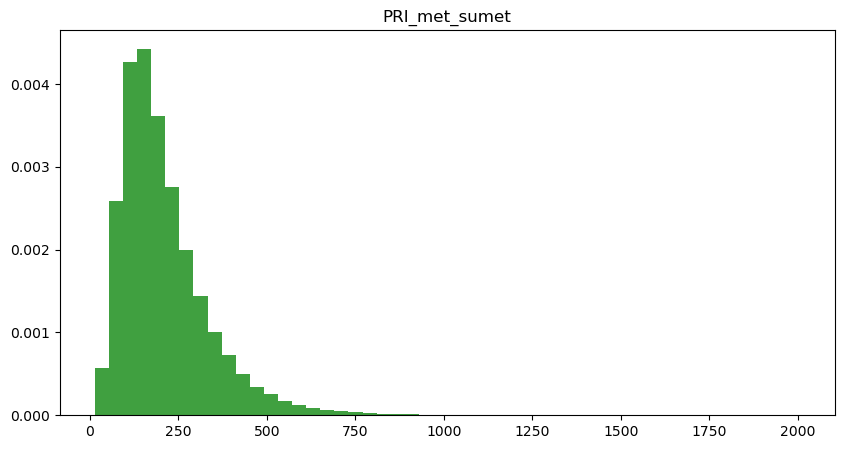

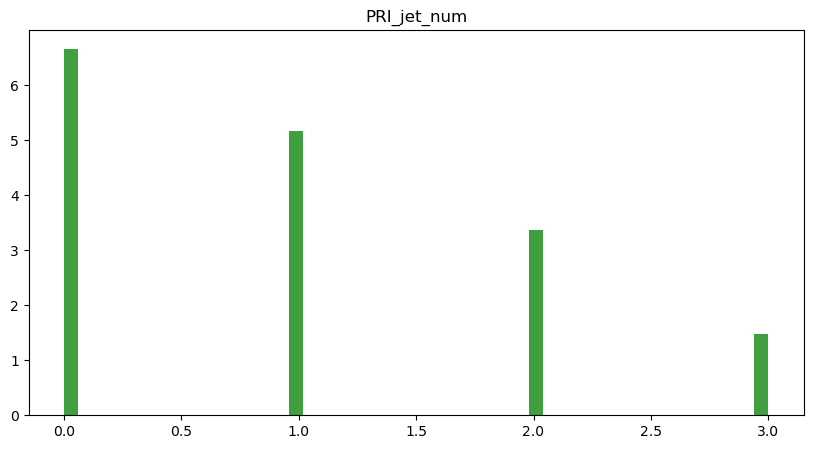

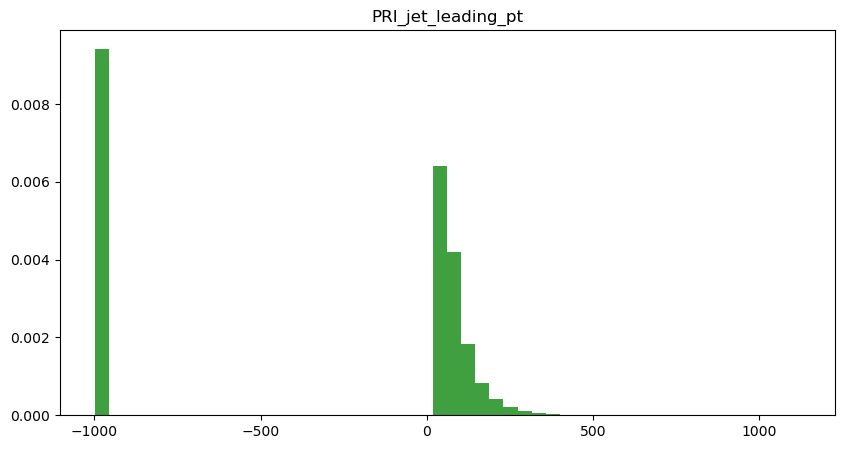

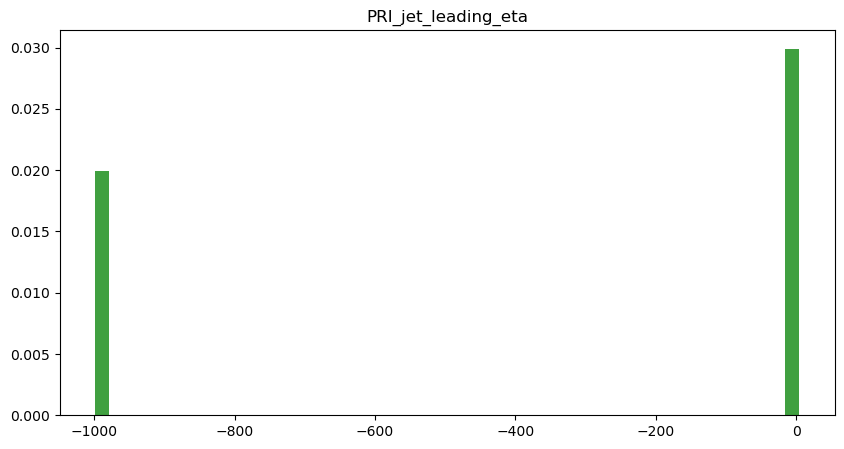

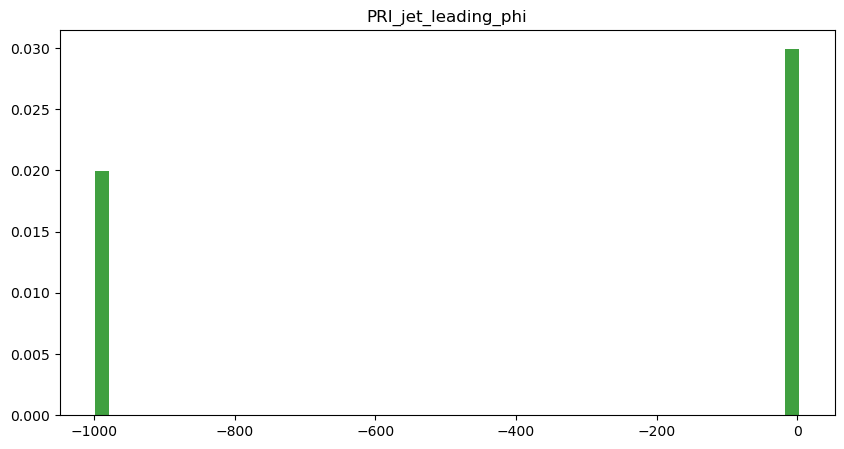

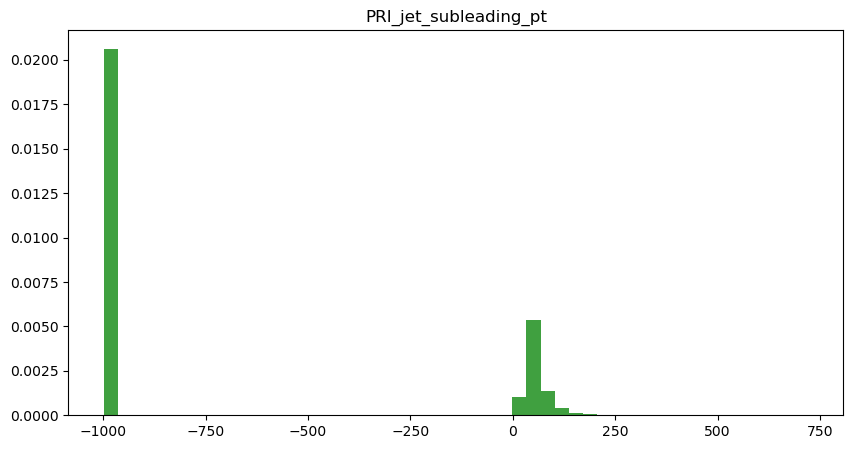

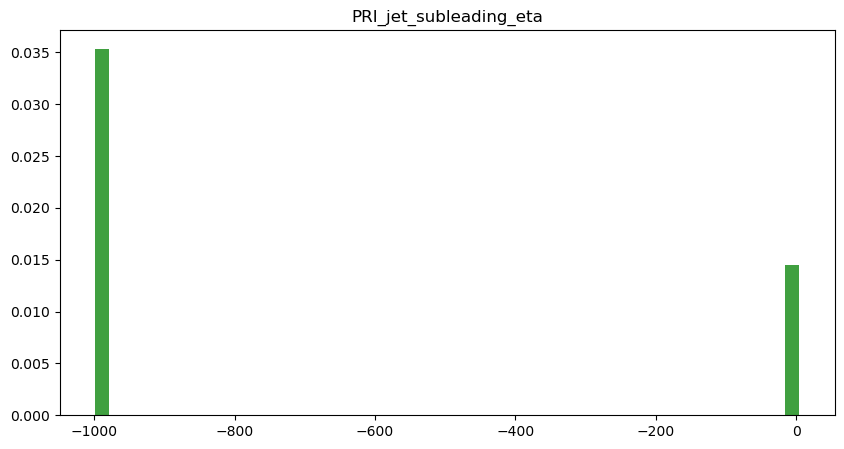

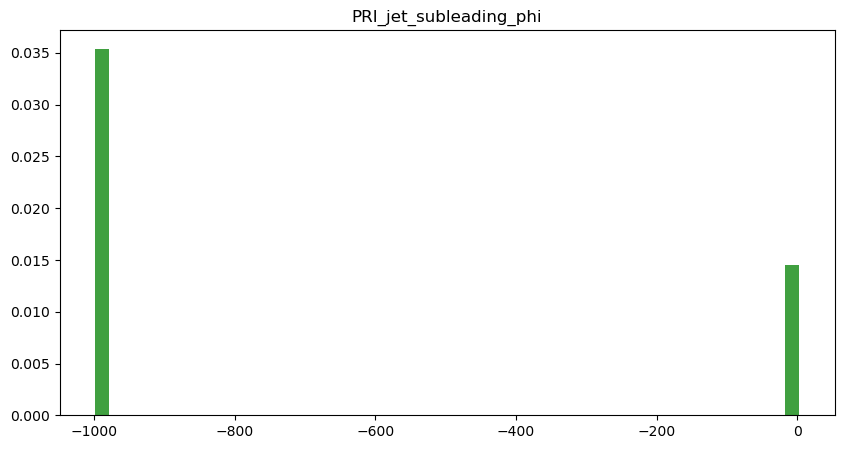

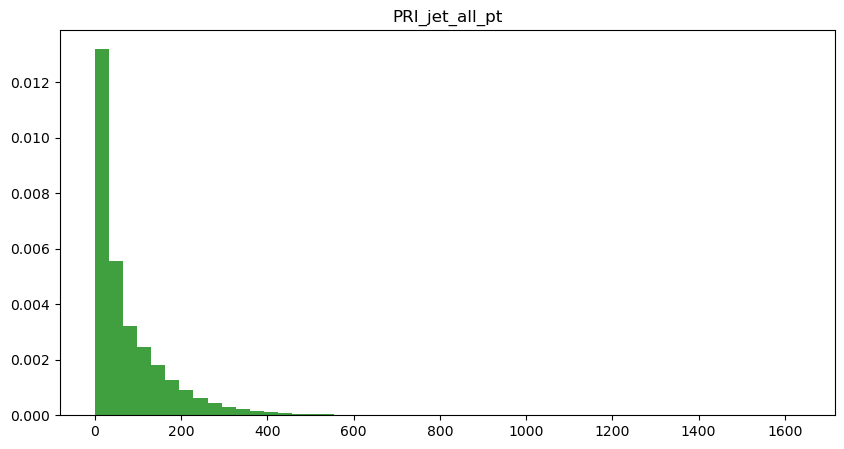

In [283]:
names = ["DER_mass_MMC", "DER_mass_transverse_met_lep", "DER_mass_vis", "DER_pt_h", "DER_deltaeta_jet_jet", "DER_mass_jet_jet", "DER_prodeta_jet_jet", "DER_deltar_tau_lep", "DER_pt_tot", "DER_sum_pt", "DER_pt_ratio_lep_tau", "DER_met_phi_centrality", "DER_lep_eta_centrality", "PRI_tau_pt", "PRI_tau_eta", "PRI_tau_phi", "PRI_lep_pt", "PRI_lep_eta", "PRI_lep_phi", "PRI_met", "PRI_met_phi", "PRI_met_sumet", "PRI_jet_num", "PRI_jet_leading_pt", "PRI_jet_leading_eta", "PRI_jet_leading_phi", "PRI_jet_subleading_pt", "PRI_jet_subleading_eta", "PRI_jet_subleading_phi", "PRI_jet_all_pt"]

#fig, axs = plt.subplots(15, 2, figsize=(50,50))

for i in range(len(names)):
    plt.figure(figsize=(10,5))
    plt.hist(x_tr[:,i], 50, density=True, facecolor='g', alpha=0.75, label=names[i])
    plt.title(names[i])

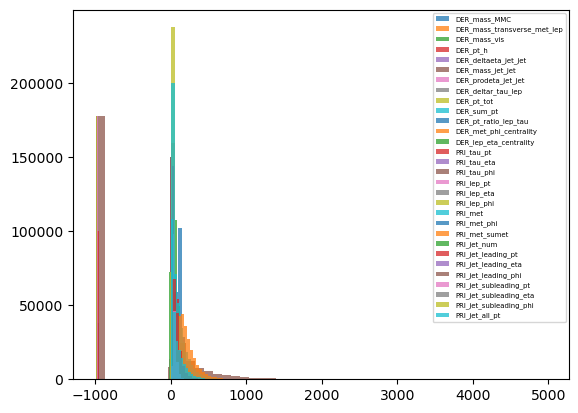

In [284]:
for i in range(len(names)):
    plt.hist(x_tr[:,i], 50, alpha=0.75, label = names[i])
    plt.legend(fontsize=5)

We can observe a very big proportion of missing data (around 175'000).  

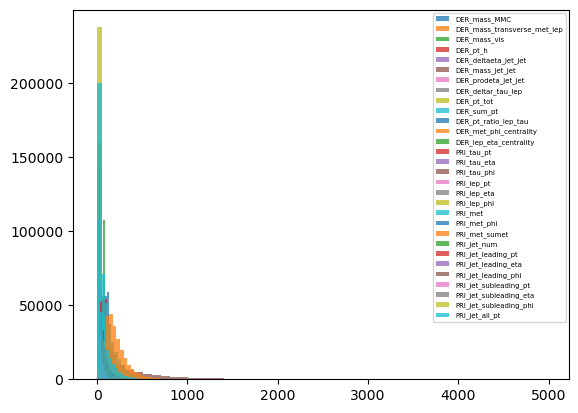

In [601]:
from load import *

#clean outliers 
x_tr_nan = put_nan(x_tr)
x_te_nan = put_nan(x_te)

for i in range(len(names)):
    plt.hist(x_tr_nan[:,i], 50, alpha=0.75, label = names[i])
    plt.legend(fontsize=5)


C:\Users\maxim\AppData\Local\Temp\ipykernel_3572\1244571567.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,5))


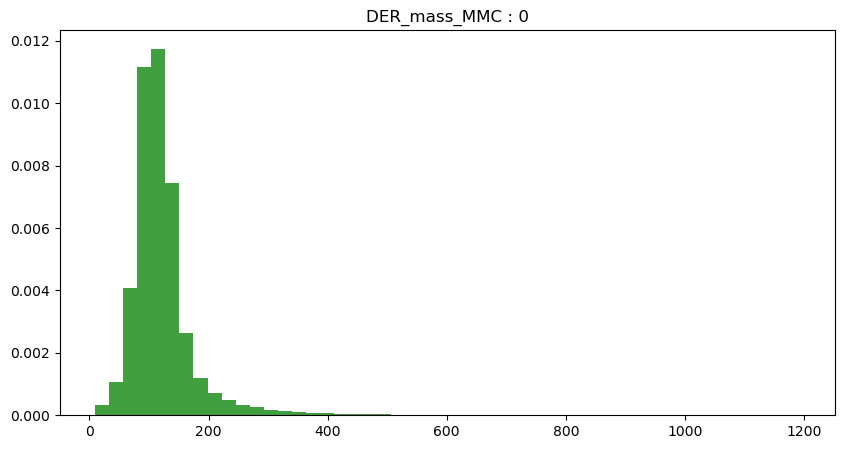

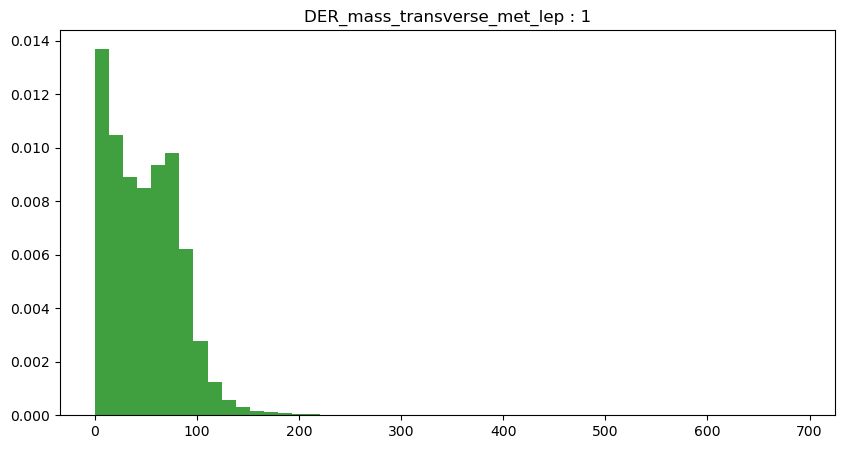

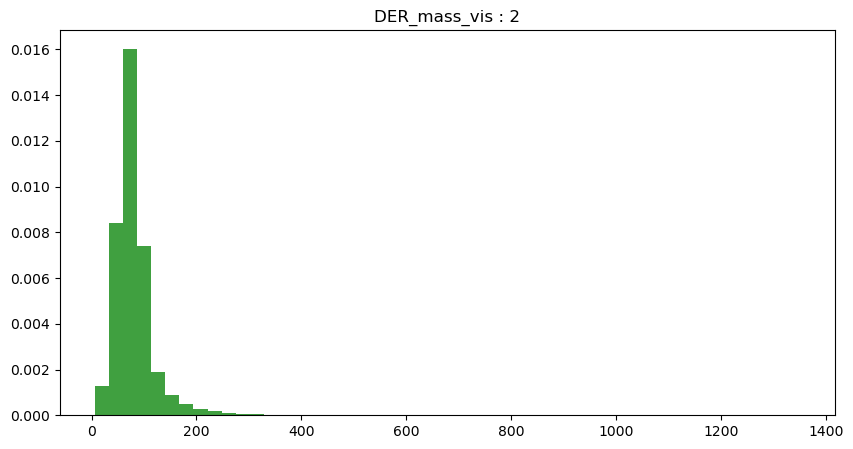

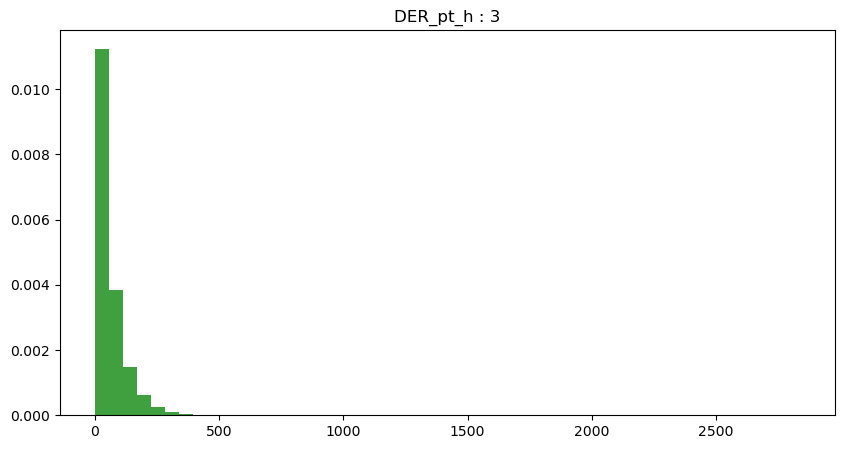

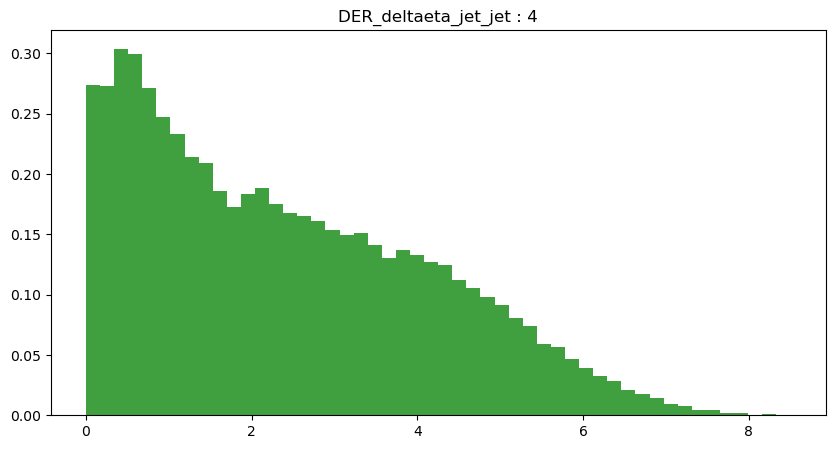

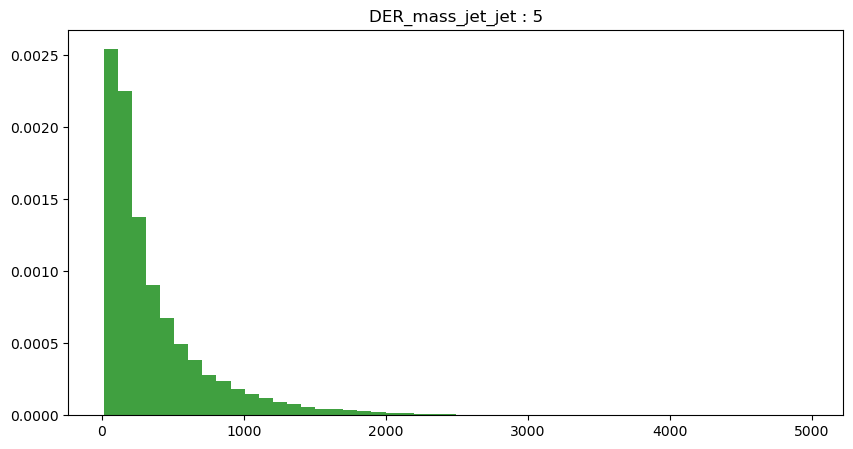

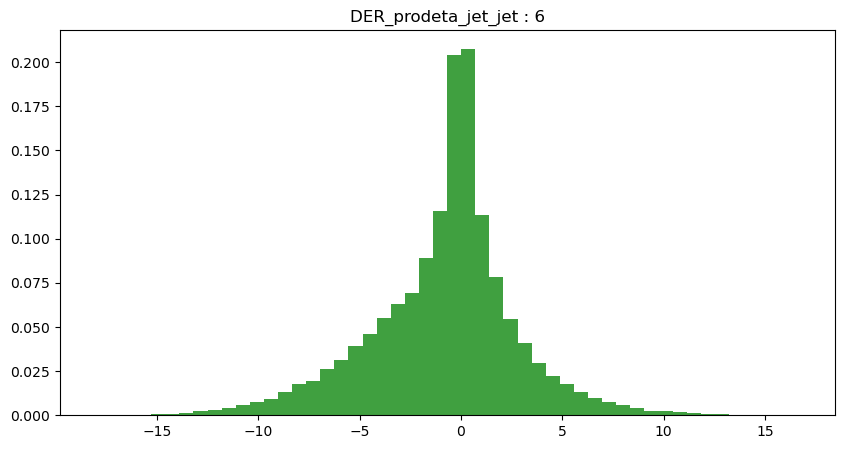

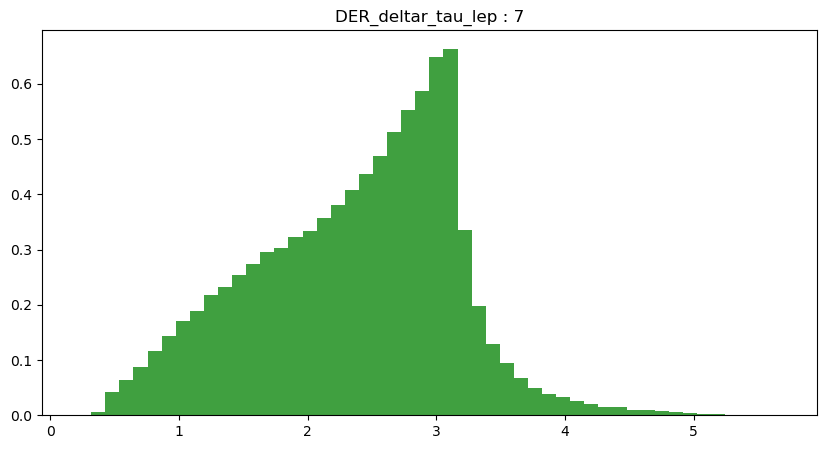

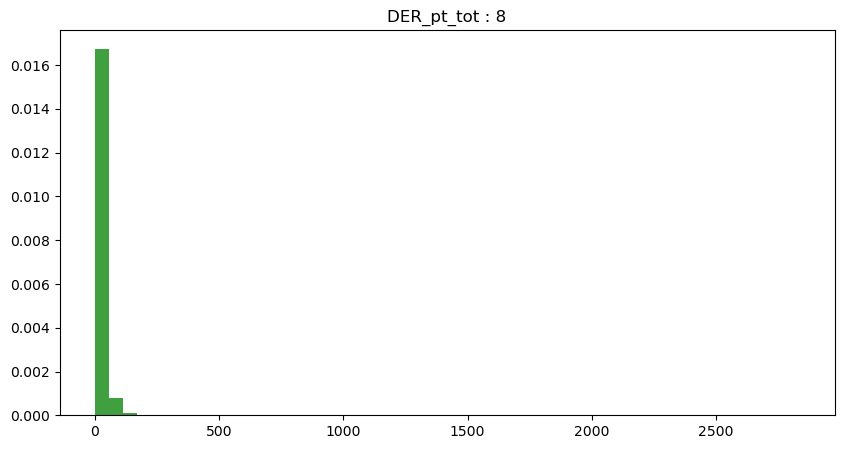

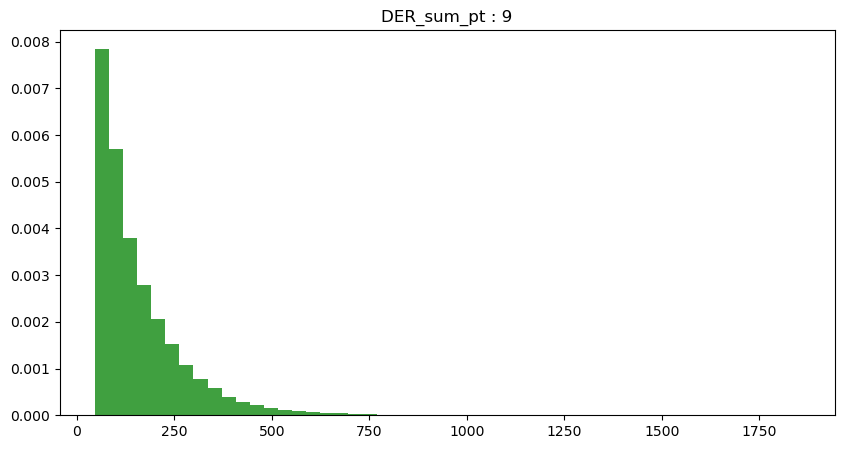

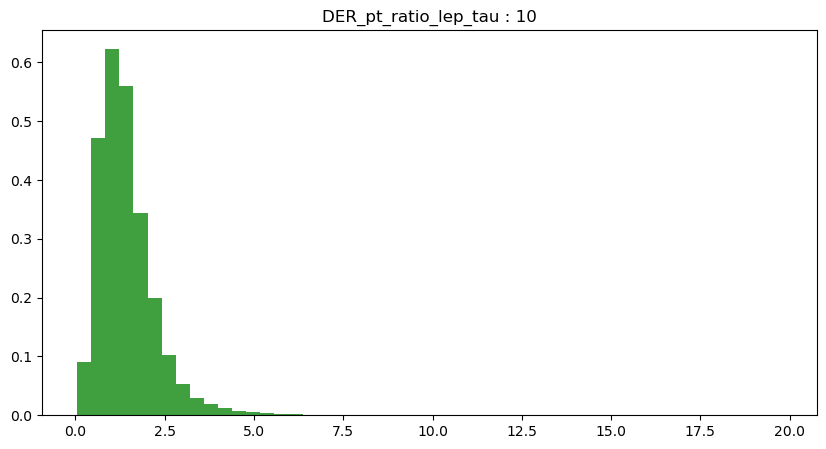

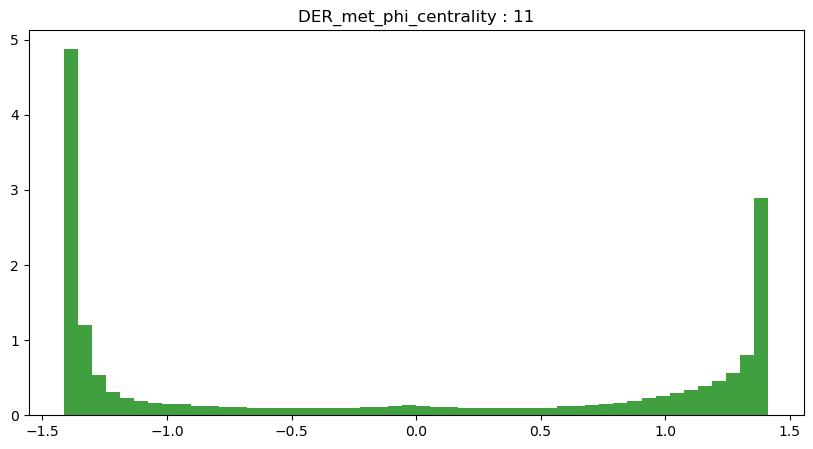

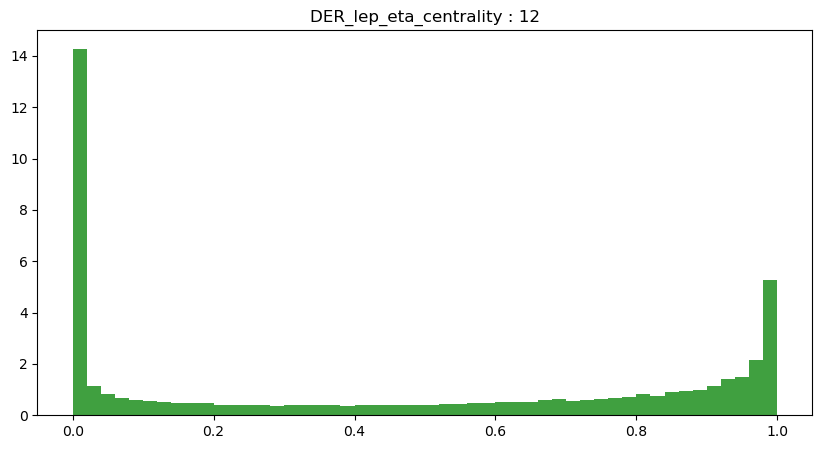

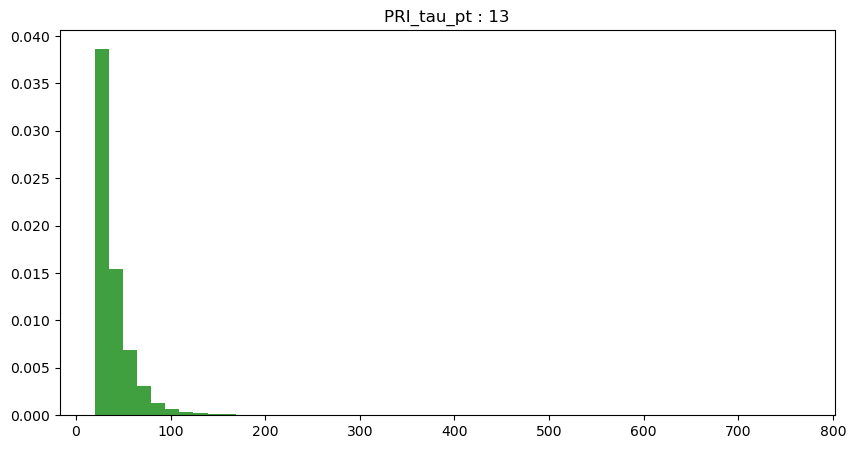

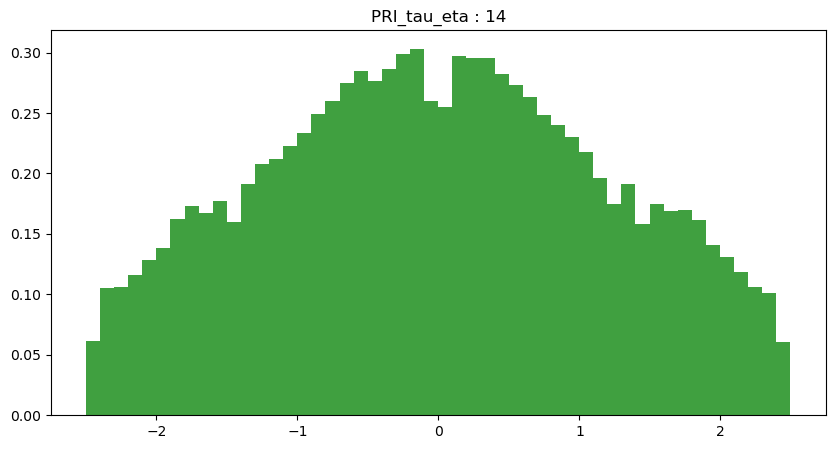

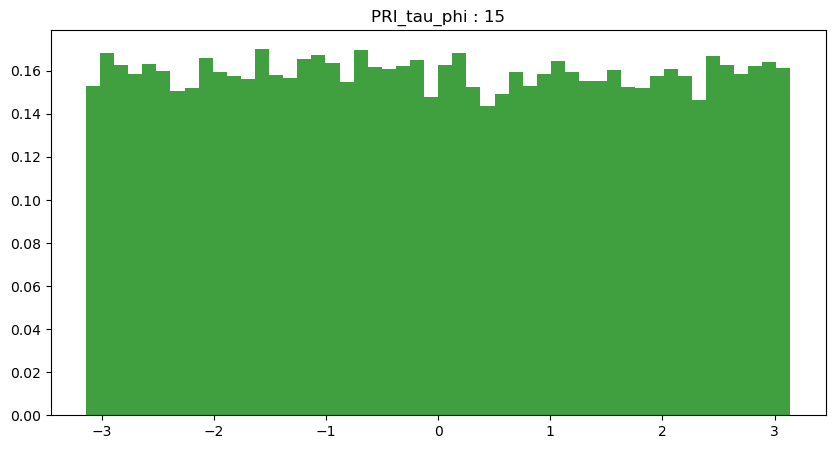

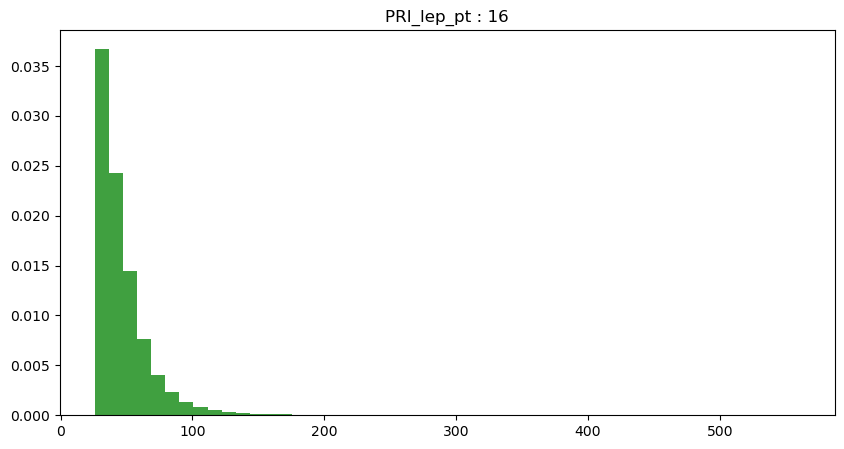

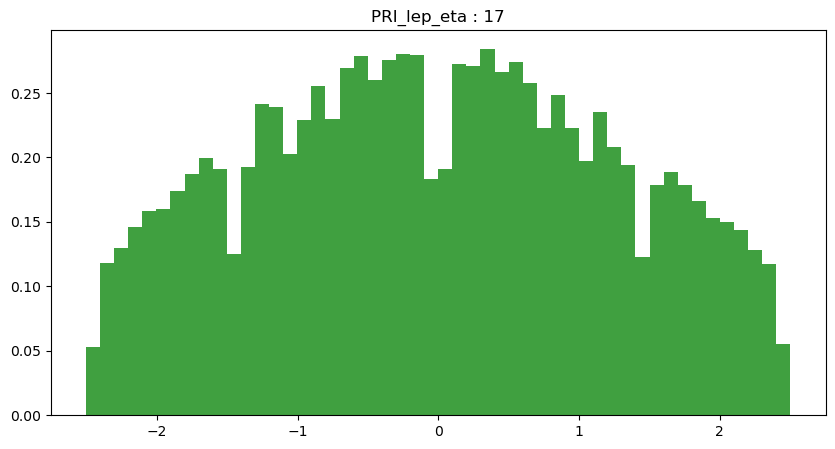

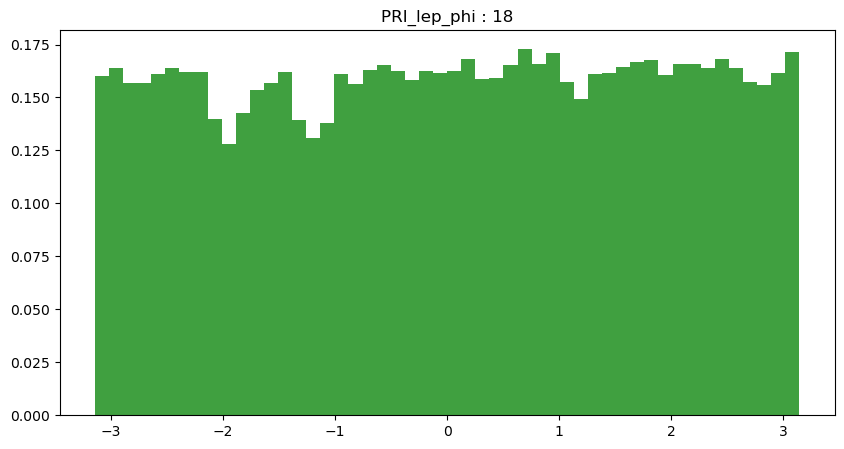

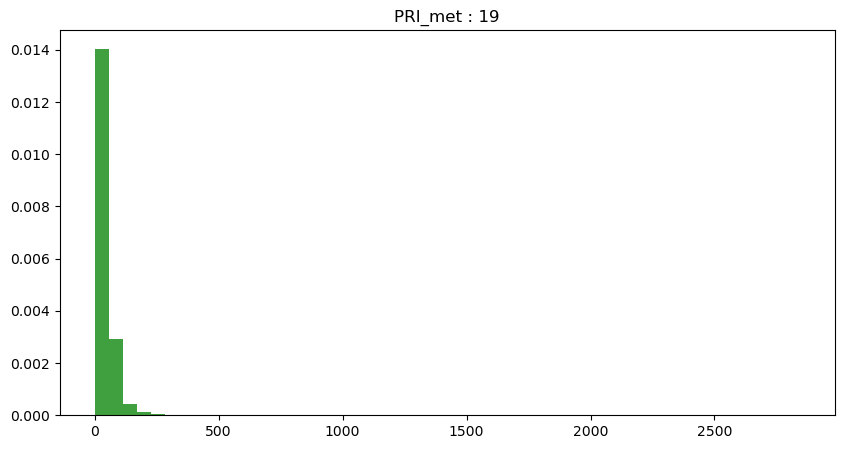

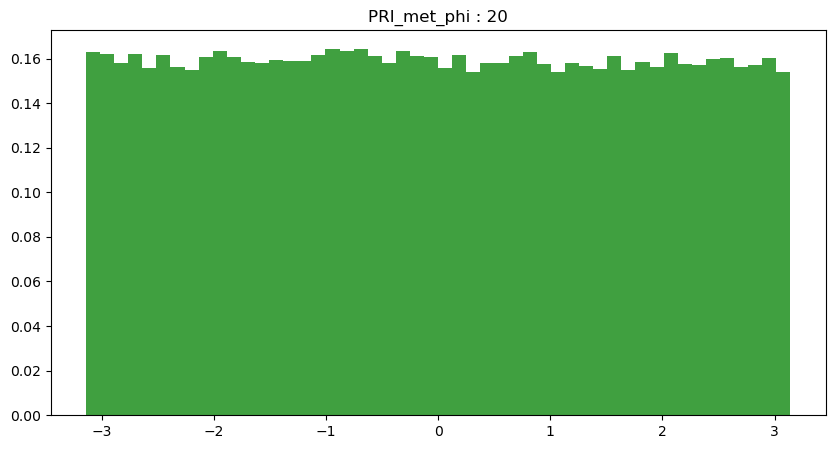

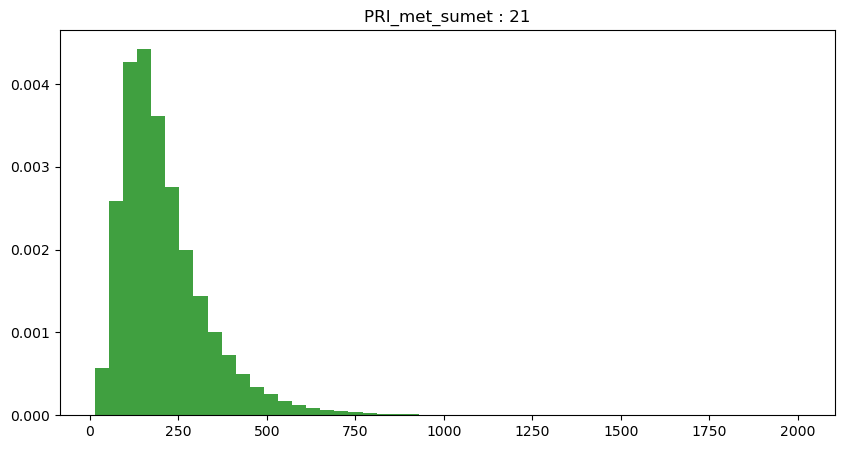

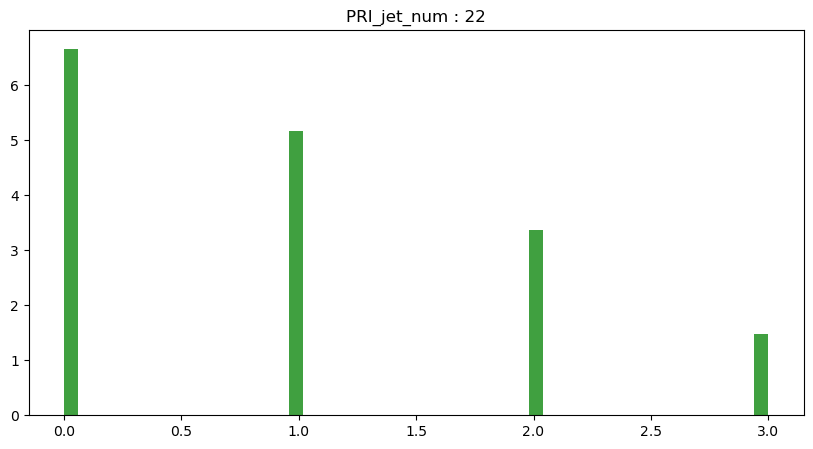

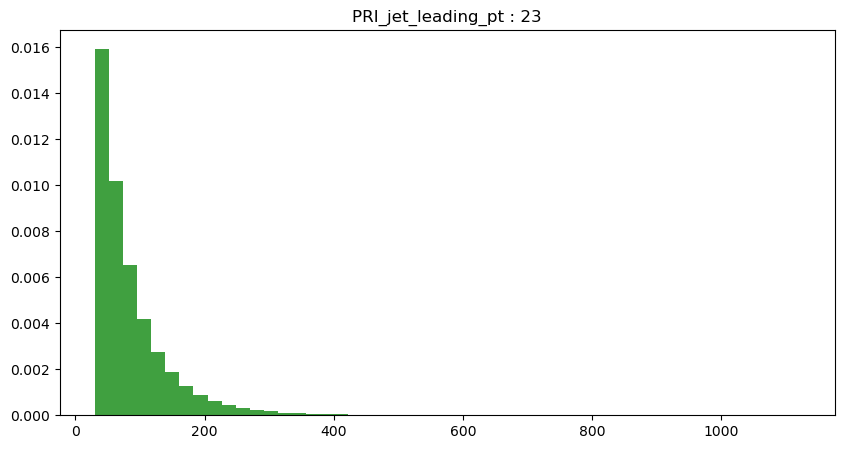

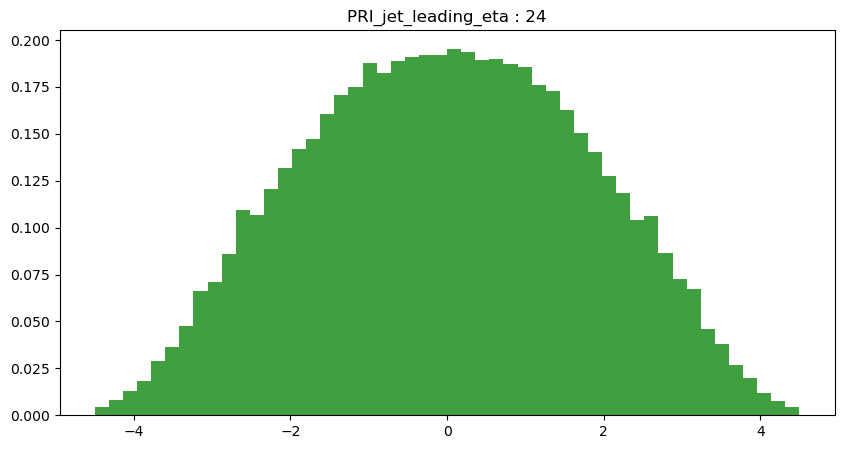

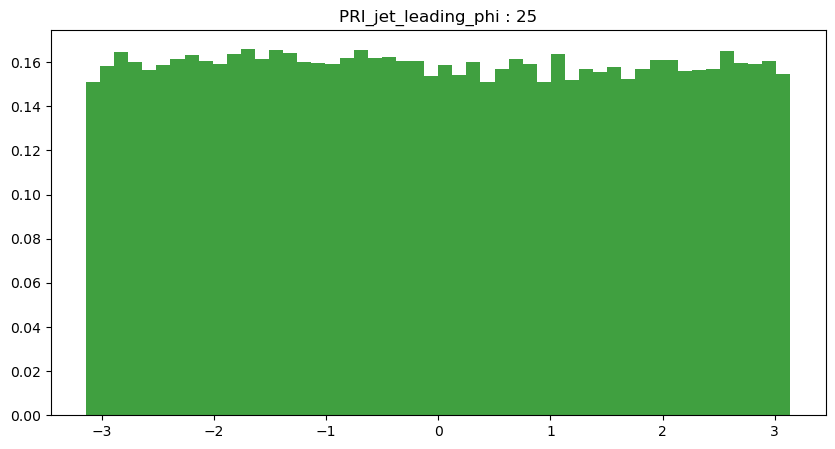

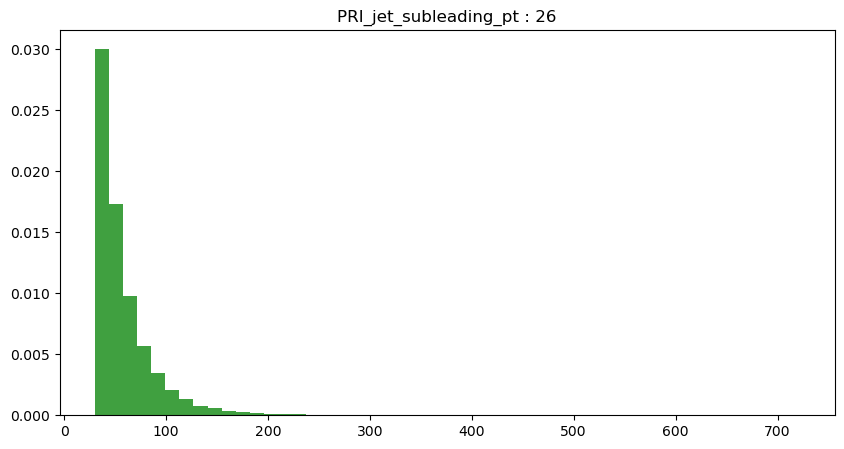

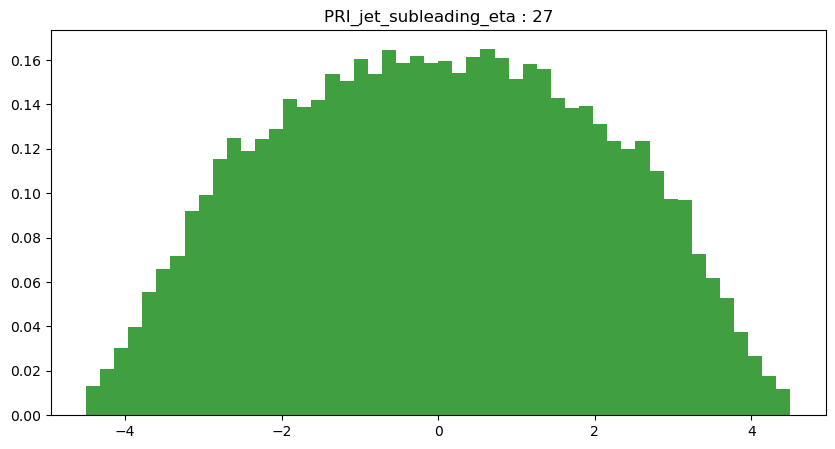

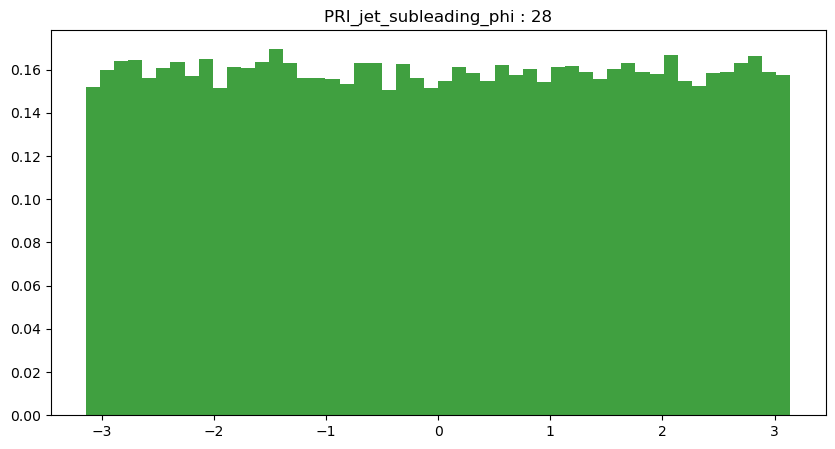

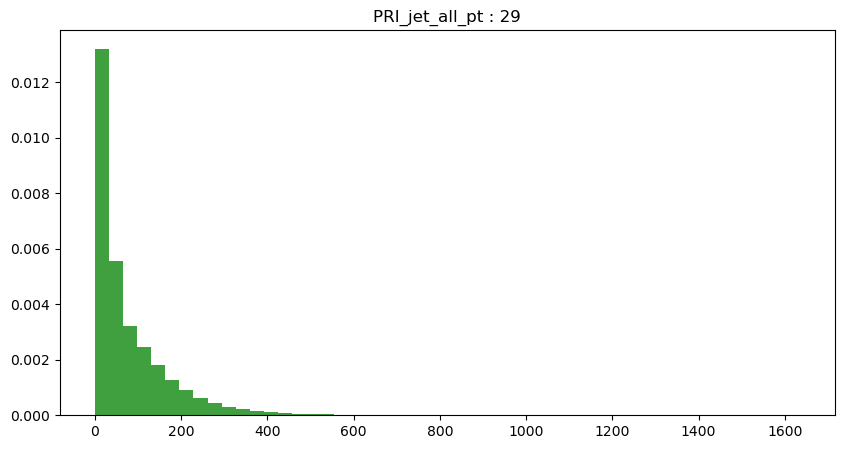

In [562]:
for i in range(len(names)):
    plt.figure(figsize=(10,5))
    plt.hist(x_tr_nan[:,i], 50, density=True, facecolor='g', alpha=0.75, label=names[i])
    plt.title(names[i] + " : " + str(i))

# Remove feature PRI_jet_num

In [596]:
x_tr_class = x_tr_nan[:, 22]
x_tr_reg = np.delete(x_tr_nan, 22, axis=1)
print(x_tr_reg.shape)

x_te_class = x_te_nan[:, 22]
x_te_reg = np.delete(x_te_nan, 22, axis=1)
print(x_te_reg.shape)

(250000, 29)
(568238, 29)


# Remove features with too many missing values

In [511]:
from load import *
#proportion of outliers
prop = proportion_of_missing_values(x_tr_reg)
print(prop)

[0.152456 0.       0.       0.       0.709828 0.709828 0.709828 0.
 0.       0.       0.       0.       0.709828 0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.399652 0.399652
 0.399652 0.709828 0.709828 0.709828 0.      ]


We can remove now features with more than 30% of missing values.

In [553]:
ind_col_missing_values = np.where(prop>0.4)
x_tr_small = np.delete(x_tr_reg, ind_col_missing_values, axis=1)
print(x_tr_small.shape)

(250000, 22)


# Expand the features

In [652]:
from load import *
degree = 4
x_tr_poly = build_poly(x_tr_reg, degree)
print(x_tr_poly.shape)


x_te_poly = build_poly(x_te_reg, degree)
print(x_te_poly.shape)


(250000, 117)
(568238, 117)


# Standardize data

We need to replace the missing data with smart values

Standardize the data using standardize from load.py  
We make sure to standardize the continuous data and not the descrete one.

In [653]:
from load import *

x_tr_norm=np.ones(x_tr_poly.shape)

# don't standardize the first column
for k in range(1, x_tr_poly.shape[1]):
    x_tr_norm[:,k] = standardize(x_tr_poly[:,k])

x_tr_median = np.nanmedian(x_tr_norm, axis=0)
x_tr_filled = fill_nan(x_tr_norm, x_tr_median)

In [654]:
x_te_norm=np.ones(x_te_poly.shape)

# don't standardize the first column
for k in range(1, x_te_poly.shape[1]):
    x_te_norm[:,k] = standardize(x_te_poly[:,k])

x_te_median = np.nanmedian(x_te_norm, axis=0)
x_te_filled = fill_nan(x_te_norm, x_te_median)


In [655]:
x_te_filled[:,0]

array([1., 1., 1., ..., 1., 1., 1.])

In [557]:
print(x_tr_filled.shape)
print(np.max(x_tr_filled, axis=0))

(250000, 59)
[  0.          18.6772151   18.13095307  31.06079422  43.6270341
   3.50086952  11.57464213   4.8856139    4.22896891 126.43222168
  14.64082662  21.70533339   1.29216437   1.35876415  32.37994915
   2.06574596   1.7339506   23.27730008   1.99410918   1.70562811
  85.14763615   1.73936983  14.18331558  17.07410953   2.52293283
   1.73895919  20.75238015   2.2206929    1.73015462  15.91961425
  47.70263237  79.00120287 119.02189543 327.63425016   5.98305367
  32.1479038   12.18276948   7.09553024 493.53409268  45.48628756
  77.08035516   0.84884455   1.6287504  138.18490581   3.00863598
   2.22703116  77.0260769    2.86087589   2.21516564 460.74975154
   2.23734696  44.02286082  57.40775659   4.69524673   2.24311893
  63.48148325   3.71222234   2.23609565  59.98097751]


In [541]:
print(x_poly[:,1])

[138.47  160.937     nan ... 105.457  94.951     nan]


# Put a column of 1's for the $w_0$

In [545]:
x_tr_filled[:, 0] = np.ones((x_tr_filled.shape[0], ))
print(x_tr_filled.shape)
print(x_tr_filled[:,1])

(250000, 59)
[ 0.28991353  0.68202131 -0.16497129 ... -0.28624947 -0.46960659
 -0.16497129]


# Split the Data in 4 parts

In [659]:
#split the data according to PRI_jet_num
x_tr_split = np.array([x_tr_filled[np.where(x_tr_class==0)], x_tr_filled[np.where(x_tr_class==1)], 
                       x_tr_filled[np.where(x_tr_class==2)], x_tr_filled[np.where(x_tr_class==3)]], dtype=object)

y_tr_split = np.array([y_tr[np.where(x_tr_class==0)], y_tr[np.where(x_tr_class==1)], 
                       y_tr[np.where(x_tr_class==2)], y_tr[np.where(x_tr_class==3)]], dtype=object)


(99913, 117)

# Find right gamma

In [573]:
from implementations import *
from load import *

tx = x_tr_filled
print(tx.shape)
y = y_tr

lambda_ = 10**(-7)
initial_w = np.array([-0.07, 0.02, 0.03, 0.2, 0.3, -0.1, 0.3, 0.3, 0.25, -0.04, 0.3, 0.3, 0.3, 0.2, 0.3, 0.3, 0.15, 0.3, 0.3, 0.1, 0.3, -0.2, 0.1, 0.3, 1, 0.3, 0.1, 0.3, 0.3, 0.2])
max_iters = 2000
fonction_to_optimize = 'reg_logistic_regression'
start_gamma = 10**(-2)
end_gamma = 2
number = 20

gamma_tab, losses_tab = search_gamma(y, tx, lambda_, initial_w, max_iters, fonction_to_optimize, start_gamma, end_gamma, number)


(250000, 59)
(20,)
gamma =  0.01
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\maxim\anaconda3\envs\ada\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\maxim\AppData\Local\Temp\ipykernel_3572\3932056772.py", line 16, in <cell line: 16>
    gamma_tab, losses_tab = search_gamma(y, tx, lambda_, initial_w, max_iters, fonction_to_optimize, start_gamma, end_gamma, number)
  File "C:\Users\maxim\Documents\EPFL_D\MA1\ML\ML_course\projects\project1\ML_project_1\load.py", line 83, in search_gamma
    w, losses = reg_logistic_regression(y, x, lambda_, initial_w, max_iters, g)
  File "C:\Users\maxim\Documents\EPFL_D\MA1\ML\ML_course\projects\project1\ML_project_1\implementations.py", line 290, in reg_logistic_regression
    loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
  File "C:\Users\maxim\Documents\EPFL_D\MA1\ML\ML_course\projects\project1\ML_project_1\implementations.py", line 272, in learning_by_penal

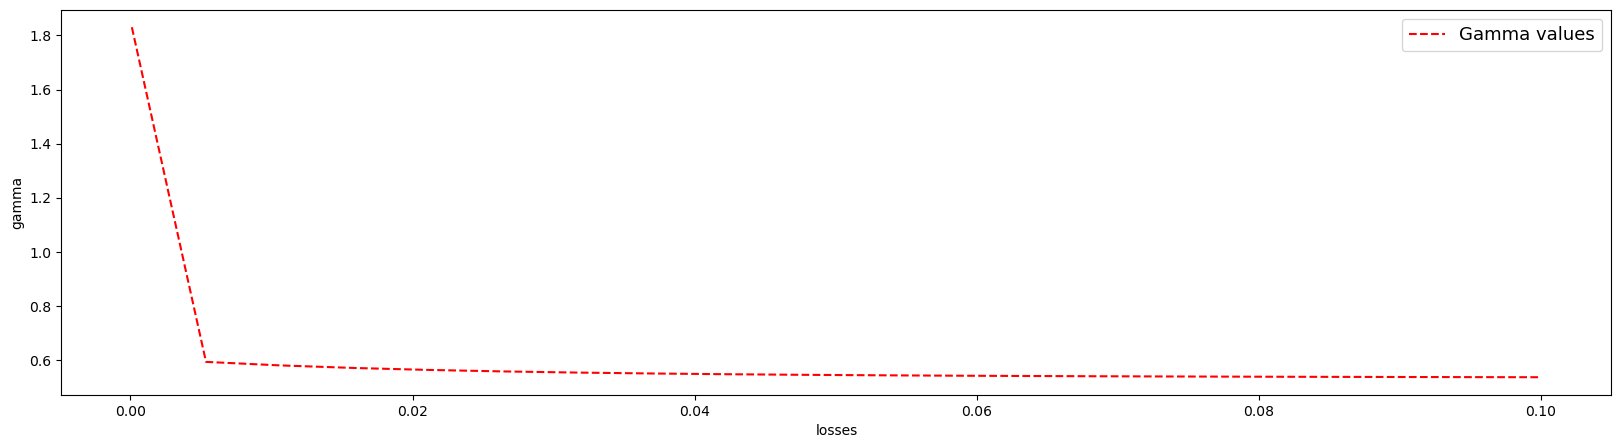

In [230]:
plt.figure(figsize=(20,5))
plt.plot(gamma_tab, losses_tab, 'r--')
plt.xlabel('losses')
plt.ylabel('gamma')
plt.legend(['Gamma values'], fontsize=13)

# TRAIN   reg_logistic_regression

In [662]:
w_tab[0].shape

(117,)

In [668]:
# from gradient_descent import *

from datetime import datetime
#from plots import *
from implementations2 import *

# Define the parameters of the algorithm.
lambda_ = 10**(-8)
#initial_w = np.full(x_tr_filled.shape[1], 0.1)
#w = np.array([0.004, -0.018, -0.0005, 0.12, 0.08, 0.2, 0.07, 0.08, 0.05, -0.04, 0.3, 0.3, 0.3, 0.2, 0.3, 0.3, 0.15, 0.3, 0.3, 0.1, 0.3, -0.2, 0.1, 0.3, 0.1,  0.3, 0.1, 0.3, 0.1])
#w = params_history[-1][0]
w = np.full(x_tr_filled.shape[1], 10**(-7))
max_iters = 1000
gamma = 10**(-1) #learing rate

w_tab=np.zeros((4, x_tr_filled.shape[1]))
#losses_tab=np.array((0,4))


for i in range(x_tr_split.shape[0]) :  
    print("DATA_SET : ", i)
    w_init = params_history[-1][i]
    w, losses = reg_logistic_regression(y_tr_split[i], x_tr_split[i], lambda_, w_init, max_iters, gamma)
    w_tab[i] = w
    #np.append[losses_tab, losses]
    
#w, losses = reg_logistic_regression(y_tr, x_tr_filled, lambda_, w, max_iters, gamma)


# Print result
#print(losses, w)


DATA_SET :  0
iteration :  0  , loss :  0.38227988671837265
iteration :  100  , loss :  0.38117471817266113
iteration :  200  , loss :  0.3802194723562405
iteration :  300  , loss :  0.37938605899339434
iteration :  400  , loss :  0.3786520015347206
iteration :  500  , loss :  0.37800056854681713
iteration :  600  , loss :  0.37741996743674533
iteration :  700  , loss :  0.376895097748171
iteration :  800  , loss :  0.37642126102925577
iteration :  900  , loss :  0.37598747924543174
0.3755933721722981
DATA_SET :  1
iteration :  0  , loss :  0.4830212199186084
iteration :  100  , loss :  0.4815687470505319
iteration :  200  , loss :  0.4802821738369565
iteration :  300  , loss :  0.47913215680731125
iteration :  400  , loss :  0.4780869924497158
iteration :  500  , loss :  0.4771344411211206
iteration :  600  , loss :  0.47626356399662434
iteration :  700  , loss :  0.4754650748801633
iteration :  800  , loss :  0.4747286590980661
iteration :  900  , loss :  0.47404951296597314
0.473427

In [669]:
params_history = []
params_history.append(w_tab)
params_history[-1][0].shape

w_tab[0].shape
len(w)

117

In [593]:
print(w_tab)

[[-3.15078009e-01 -1.45186271e-02 -3.63844128e-01 -3.69157533e-02
   1.82673196e-01  5.36642828e-02  1.15589036e-01 -5.07811691e-02
   8.55087935e-02 -2.93239415e-02  2.45509343e-01 -1.60350345e-01
   1.90100200e-01  3.39025418e-03  2.26965072e-01  1.06319138e-03
  -2.24993888e-03  1.35545973e-02  1.15007617e-02  2.04797606e-03
  -2.64543628e-02 -2.90773191e-03  1.97717839e-01  1.00041922e-01
  -5.78160462e-04  3.58053446e-03  9.63143074e-02 -2.86161335e-04
   7.24359162e-05  2.34871566e-01 -4.54774915e-02 -1.13840644e-01
  -8.50792858e-02  8.65561426e-02  1.29870439e-01  1.01631083e-01
   1.30662627e-01  7.48435699e-02  3.53724264e-03  1.36337107e-01
  -3.18747634e-02 -3.07658239e-02  1.32444842e-01  8.07076441e-02
  -6.91121953e-02 -1.28957620e-03  2.56305551e-02 -1.16175672e-01
  -2.01702107e-03  2.28547399e-02  3.03412125e-03  1.34660349e-01
   9.55600167e-02  1.20705231e-01  8.74012167e-02  7.96500104e-02
   1.13297565e-01  8.76525551e-02  1.06457925e-01]
 [-4.90144472e-01  6.7460

In [639]:
x_te_filled[5]@w_tab[0]

-2.623357511753446

# TEST

In [670]:
print(tx.shape)

print(x_te.shape)
#x_te2 = np.delete(x_te, ind_col_missing_values, axis=1)

proba=[]
y_hat=[]
x_te_id = x_te[:, 22]
x_te_ = x_te_filled


for j in range(x_te_.shape[0]):
    if x_te_id[j]==0:
        proba.append(x_te_[j]@w_tab[0])
        
    elif x_te_id[j]==1:
        proba.append(x_te_[j]@w_tab[1])
        
    elif x_te_id[j]==2:
        proba.append(x_te_[j]@w_tab[2])
        
    elif x_te_id[j]==3:
        proba.append(x_te_[j]@w_tab[3])
        
    else : 
        proba.append(x_te_[j]@w)
        

for i in proba:
    if i>0:
        y_hat.append(1)
    else :
        y_hat.append(-1)


(250000, 59)
(568238, 30)


We fix the initial values of the parameters, based on running the algorithm several times and noting down the final parameter values. It gives us a better starting point and helps to achieve a better performance in a limited number of iterations.

# Create csv for submission

In [671]:
from helpers import *

create_csv_submission(ids_te, y_hat, 'submission3')